In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mushroom = pd.read_csv('data/mushrooms.csv')

In [5]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
x = mushroom.drop('class', axis=1)
y = mushroom['class']

In [9]:
#encoding features in 'x'
for col in x.columns():
#     print(name,col)
    x[col] = x[col].astype('category').cat.codes

In [10]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=20)

## Automating parameter tuning with GridSearchCV and RandomizedSearchCV
[Refer me for more details](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### RandomizedSearchCV
sample a given number of candidates from a parameter space with a specified distribution.

In [218]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 11),
              "min_samples_split": range(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [219]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=10, cv=5)

In [220]:
random_search.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': range(1, 11), 'min_samples_split': range(2, 11), 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [23]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
random_search.best_params_

{'min_samples_split': 3,
 'max_features': 8,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

In [27]:
random_search.best_score_

0.9199901526341704

In [28]:
random_search.grid_scores_

[mean: 0.89365, std: 0.14814, params: {'min_samples_split': 5, 'max_features': 1, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True},
 mean: 0.84872, std: 0.14131, params: {'min_samples_split': 2, 'max_features': 7, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False},
 mean: 0.84109, std: 0.14357, params: {'min_samples_split': 8, 'max_features': 3, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': True},
 mean: 0.89057, std: 0.09161, params: {'min_samples_split': 6, 'max_features': 7, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': True},
 mean: 0.90547, std: 0.12609, params: {'min_samples_split': 2, 'max_features': 4, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False},
 mean: 0.89894, std: 0.13673, params: {'min_samples_split': 3, 'max_features': 5, 'max_depth': None, 'criterion': 'gini', 'bootstrap': True},
 mean: 0.91999, std: 0.10163, params: {'min_samples_split': 3, 'max_features': 8, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False},
 me

In [ ]:
random_search.

### Grid Search
exhaustively considers all parameter combinations

In [13]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [16]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid_search.best_score_

0.9437469226981783

___

## Understanding Ensemble
![](images/ensemble.jpeg)

# Gradient boosted Tree

In [223]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [224]:
clf = RandomForestClassifier()

In [225]:
scores = cross_val_score(clf, x, y, cv=5)

In [226]:
scores.mean()

0.8926456784340484

In [227]:
clf = GradientBoostingClassifier()

In [228]:
scores = cross_val_score(clf, x, y, cv=5); scores.mean()

0.9166649249804358

Clearly, out of the box Gradient boosted tree (GBT) is performing better than RandomForest. This will mostly be the case for most of the datasets.
Also, you might have already noticed that it takes some considerable amount of time to train. Hence, we use XGBoost implementation of GBT. Its much faster and memory efficient. [Read this](https://stats.stackexchange.com/questions/282459/xgboost-vs-python-sklearn-gradient-boosted-trees) to find out why and how?

**Note:** We also have *Lightgm* (a gradient boosting framework/library that uses tree based learning algorithms) by microsoft 
___

# Feature Importance

Know the important features is the first step towards analysis.
- Limited features to works on
- Understand How these features matter in domain
- Saves alot of computation

In [247]:
titanic = pd.read_csv('data/titanic.csv'); df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
def process_titaninc(dataframe):
    df = dataframe.copy()
    ## preprocessing
    df['family_size'] = df.SibSp + df.Parch + 1
    df['is_alone'] = (df.family_size == 0)#.astype('int')
    df['has_cabin'] = df.Cabin.notnull()
#     df['fare_per_person'] = df.Fare/df.family_size
    
    ## encoding categorical features
    df.drop('Cabin', axis=1, inplace=True)
    df.Sex = df.Sex.astype('category').cat.codes
    df.Embarked = df.Embarked.astype('category').cat.codes
    df.Name = df.Name.astype('category').cat.codes
    
    ## Processing tickets
    df.Ticket = df.Ticket.str.split(' ').str[-1]
    
    ## Handling Missing values
    df['Age_p'] = df.Age.isnull() # adding an extra column indicating whether the value are present or not.
    df.loc[df.Age.isnull(), 'Age'] = df.Age.mean()
    df.Age = df.Age.astype('int')
    
    ## Dropping recordes 
    df.drop(df.loc[df.Ticket == 'LINE'].index, axis=0, inplace=True)
    
    return df.drop('Survived', axis=1), df.Survived

In [249]:
x, y = process_titaninc(titanic)

In [250]:
from sklearn.model_selection import train_test_split

In [262]:
x = x[to_keep]

In [269]:
x.drop('Name', axis=1, inplace=True)

In [270]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [271]:
clf = RandomForestClassifier()

In [272]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
clf.score(X_train, y_train),clf.score(X_test, y_test) # all data

(0.9901269393511989, 0.8258426966292135)

In [268]:
clf.score(X_train, y_train),clf.score(X_test, y_test) # only impor fea

(0.9873060648801129, 0.8033707865168539)

### 1. Feature Importance from RFC

In [275]:
clf.feature_importances_

array([0.03736483, 0.14686107, 0.17540743, 0.22964582, 0.19218616,
       0.21853469])

In [276]:
feature_importance = pd.DataFrame({'importance': clf.feature_importances_}, index= x.columns).sort_values('importance')

In [277]:
feature_importance

,importance
has_cabin,0.037365
Age,0.146861
PassengerId,0.175407
Fare,0.192186
Sex,0.218535
Ticket,0.229646


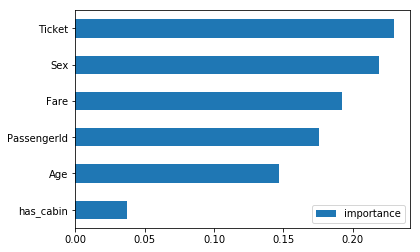

In [278]:
feature_importance.plot.barh()

In [261]:
feature_importance[feature_importance.importance > 0.05]#.index

,importance
Pclass,0.050671
PassengerId,0.095347
Fare,0.103604
Age,0.107543
Name,0.123315
Ticket,0.149696
Sex,0.235653


In [110]:
to_keep = feature_importance[feature_importance.importance > 0.05].index

___
**Note:** Next two techniques can be used with any model
___

### 2. Feature Importance Using LOFO (Leave one feature out)
[watch me](https://www.youtube.com/watch?v=zqsQ2ojj7sE)

In [151]:
x, y = process_titaninc(titanic)

In [152]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [153]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_train,y_train), clf.score(X_test, y_test)

(0.9802538787023978, 0.8370786516853933)

In [158]:
results = {}
for col in x.columns:
    temp_x = x.drop(col,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(temp_x,y, test_size = 0.2)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
#     print(f'dropped {col}: train_score - {clf.score(X_train,y_train):.3f}, test_score - {clf.score(X_test, y_test):.3f}')
    results[col] = [clf.score(X_train,y_train), clf.score(X_test, y_test)]

In [159]:
pd.DataFrame(results).T.sort_values(by=1)

,0,1
Sex,0.970381,0.758427
Parch,0.992948,0.769663
is_alone,0.981664,0.769663
family_size,0.990127,0.780899
has_cabin,0.991537,0.780899
Name,0.981664,0.792135
Fare,0.988717,0.792135
Pclass,0.983075,0.797753
Age,0.985896,0.803371
Ticket,0.974612,0.808989


### 3. More Efficient Method (Randomly shuffling the values)

In [186]:
x, y = process_titaninc(titanic)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [200]:
from sklearn.svm import SVC

In [201]:
# clf = RandomForestClassifier()
clf = SVC()
clf.fit(X_train, y_train)
clf.score(X_train,y_train), clf.score(X_test, y_test)

(1.0, 0.6404494382022472)

In [196]:
results ={}
for name, col in X_train.items():
    temp_x_train = X_train.copy()
    temp_x_train[name] = np.random.permutation(col)
#     print(f'{name} shuffled: Train_score: {clf.score(temp_x_train, y_train):.3f}')
    results[name]= clf.score(temp_x_train, y_train)

In [197]:
pd.Series(results).sort_values()

Sex            0.777151
Ticket         0.882934
Fare           0.901269
Age            0.908322
Pclass         0.922426
PassengerId    0.932299
Name           0.939351
Embarked       0.952045
has_cabin      0.959097
Parch          0.964739
Age_p          0.964739
SibSp          0.973202
family_size    0.973202
is_alone       0.985896
dtype: float64

____

In [240]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
print(accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

# Evaluation Metric for classification problems

The metrics that you choose to evaluate your machine learning model is very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared.

### Confusion Metric
The Confusion matrix is one of the most intuitive and easiest metrics used for finding the correctness and accuracy of the model. It is used for Classification problem where the output can be of two or more types of classes.

The confusion matrix, is a table with two dimensions (“Actual” and “Predicted”), and sets of “classes” in both dimensions. Our Actual classifications are columns and Predicted ones are Rows.

![](images/confusion.jpg)

The Confusion matrix in itself is not a performance measure as such, but almost all of the performance metrics are based on Confusion Matrix and the numbers inside it.

#### Terms associated with Confusion matrix:
- **True Positives (TP)**: True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)

    Ex: The case where a person is actually having cancer(1) and the model classifying his case as cancer(1) comes under True positive.

- **True Negatives (TN)**: True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False

    Ex: The case where a person NOT having cancer and the model classifying his case as Not cancer comes under True Negatives.

- **False Positives (FP)**: False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one. (1)

    Ex: A person NOT having cancer and the model classifying his case as cancer comes under False Positives.

- **False Negatives (FN)**: False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one. (0)

    Ex: A person having cancer and the model classifying his case as No-cancer comes under False Negatives.

#### When to minimise what?

We know that there will be some error associated with every model that we use for predicting the true class of the target variable. This will result in False Positives and False Negatives(i.e Model classifying things incorrectly as compared to the actual class).

There’s no hard rule that says what should be minimised in all the situations. It purely depends on the business needs and the context of the problem you are trying to solve. Based on that, we might want to minimise either False Positives or False negatives.

1. **Minimising False Negatives:**

    Let’s say in our cancer detection problem example, out of 100 people, only 5 people have cancer. In this case, we want to correctly classify all the cancerous patients as even a very BAD model(Predicting everyone as NON-Cancerous) will give us a 95% accuracy(will come to what accuracy is). But, in order to capture all cancer cases, we might end up making a classification when the person actually NOT having cancer is classified as Cancerous. This might be okay as it is less dangerous than NOT identifying/capturing a cancerous patient since we will anyway send the cancer cases for further examination and reports. But missing a cancer patient will be a huge mistake as no further examination will be done on them.

2. **Minimising False Positives:**

    For better understanding of False Positives, let’s use a different example where the model classifies whether an email is spam or not

    Let’s say that you are expecting an important email like hearing back from a recruiter or awaiting an admit letter from a university. Let’s assign a label to the target variable and say,1: “Email is a spam” and 0:”Email is not a spam”

    Suppose the Model classifies that important email that you are desperately waiting for, as Spam(case of False positive). Now, in this situation, this is pretty bad than classifying a spam email as important or not spam since in that case, we can still go ahead and manually delete it and it’s not a pain if it happens once a while. So in case of Spam email classification, minimising False positives is more important than False Negatives.

### Accuracy
Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made.

![](images/acc.png)

In the Numerator, are our correct predictions (True positives and True Negatives)(Marked as red in the fig above) and in the denominator, are the kind of all predictions made by the algorithm(Right as well as wrong ones).

**When to use Accuracy:**

Accuracy is a good measure when the target variable classes in the data are nearly balanced.

Ex:60% classes in our fruits images data are apple and 40% are oranges.

A model which predicts whether a new image is Apple or an Orange, 97% of times correctly is a very good measure in this example.

**When NOT to use Accuracy:**

Accuracy should NEVER be used as a measure when the target variable classes in the data are a majority of one class.

Ex: In our cancer detection example with 100 people, only 5 people has cancer. Let’s say our model is very bad and predicts every case as No Cancer. In doing so, it has classified those 95 non-cancer patients correctly and 5 cancerous patients as Non-cancerous. Now even though the model is terrible at predicting cancer, The accuracy of such a bad model is also 95%.

### Precision
Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer. The predicted positives (People predicted as cancerous are TP and FP) and the people actually having a cancer are TP.

![](images/precision.png)

Ex: In our cancer example with 100 people, only 5 people have cancer. Let’s say our model is very bad and predicts every case as Cancer. Since we are predicting everyone as having cancer, our denominator(True positives and False Positives) is 100 and the numerator, person having cancer and the model predicting his case as cancer is 5. So in this example, we can say that Precision of such model is 5%.

### Recall and Sensitivity
Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer. The actual positives (People having cancer are TP and FN) and the people diagnosed by the model having a cancer are TP. (Note: FN is included because the Person actually had a cancer even though the model predicted otherwise).

![](images/recall.png)

Ex: In our cancer example with 100 people, 5 people actually have cancer. Let’s say that the model predicts every case as cancer.

So our denominator(True positives and False Negatives) is 5 and the numerator, person having cancer and the model predicting his case as cancer is also 5(Since we predicted 5 cancer cases correctly). So in this example, we can say that the Recall of such model is 100%. And Precision of such a model(As we saw above) is 5%

**When to use Precision and When to use Recall?:**

It is clear that recall gives us information about a classifier’s performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).

**Precision** is about being precise. So even if we managed to capture only one cancer case, and we captured it correctly, then we are 100% precise.

**Recall** is not so much about capturing cases correctly but more about capturing all cases that have “cancer” with the answer as “cancer”. So if we simply always say every case as “cancer”, we have 100% recall.

So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimising False positives, then our focus should be to make Precision as close to 100% as possible.

### F1 Score
We don’t really want to carry both Precision and Recall in our pockets every time we make a model for solving a classification problem. So it’s best if we can get a single score that kind of represents both Precision(P) and Recall(R).

One way to do that is simply taking their arithmetic mean. i.e (P + R) / 2 where P is Precision and R is Recall. But that’s pretty bad in some situations. So, we take Harmonic mean of precision and recall.

Suppose we have 100 credit card transactions, of which 97 are legit and 3 are fraud and let’s say we came up a model that predicts everything as fraud. (Horrendous right!?)

Precision and Recall for the example is shown in the fig below.

![](images/f1.png)

Harmonic mean is kind of an average when x and y are equal. But when x and y are different, then it’s closer to the smaller number as compared to the larger number.

For our previous example, F1 Score = Harmonic Mean(Precision, Recall)

F1 Score = 2 * Precision * Recall / (Precision + Recall) = 2*3*100/103 = 5%

So if one number is really small between precision and recall, the F1 Score kind of raises a flag and is more closer to the smaller number than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.